<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [120]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [121]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [122]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [123]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [124]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [125]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [126]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 10 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 itens and each item itself list of 10 values 
    and S_actual, I_actual, R_actual are list of S, I, R respectively for (day +1) value for each of 10 days for each of 1000 rows   """

S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [127]:
""" merging 1000 lists each of 10 items into a single list of 10000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]  

recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]


In [128]:
""" list to dataframe """

df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [129]:
""" merging all dataframes into a single dataframe """

data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], axis=1)
data.columns = range(data.shape[1])
data.head()

,0,1,2,3,4,5
0,202.845929,4.257704e-05,797.154029,202.845919,2.911852e-05,797.154051
1,202.873033,3.974387e-02,797.087223,202.864456,2.718158e-02,797.108362
2,202.845900,4.689102e-10,797.154100,202.845900,1.500810e-10,797.154100
3,202.845900,-2.340755e-10,797.154100,202.845900,-2.226000e-10,797.154100
4,202.845900,9.852386e-08,797.154100,202.845900,6.711261e-08,797.154100


In [131]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [132]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5
0,3.650640e-08,2.766091e-07,1.000000,2.496705e-08,1.891745e-07,1.000000
1,3.408053e-05,2.582000e-04,0.999916,2.330757e-05,1.765879e-04,0.999943
2,9.108270e-13,6.139291e-12,1.000000,6.509238e-13,4.068006e-12,1.000000
3,3.080869e-13,1.572274e-12,1.000000,3.314016e-13,1.646846e-12,1.000000
4,8.498385e-11,6.431631e-10,1.000000,5.806533e-11,4.390969e-10,1.000000
...,...,...,...,...,...,...
9995,4.573244e-04,3.459932e-03,0.998875,3.736899e-04,2.827958e-03,0.999081
9996,3.736886e-04,2.827958e-03,0.999081,3.053521e-04,2.311322e-03,0.999249
9997,1.476866e-05,1.118971e-04,0.999964,1.206841e-05,9.143871e-05,0.999970
9998,9.989855e-01,9.116573e-03,0.000507,9.975672e-01,1.278479e-02,0.001217


In [133]:
X = data_scaled[[0,1,2]]
y = data_scaled[[3,4,5]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)




Epoch 00001: val_accuracy improved from -inf to 0.97250, saving model to weights-improvement-01-0.97.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy improved from 0.97250 to 0.98250, saving model to weights-improvement-02-0.98.hdf5

Epoch 00003: val_accuracy improved from 0.98250 to 0.98438, saving model to weights-improvement-03-0.98.hdf5

Epoch 00004: val_accuracy did not improve from 0.98438

Epoch 00005: val_accuracy did not improve from 0.98438

Epoch 00006: val_accuracy did not improve from 0.98438

Epoch 00007: val_accuracy did not improve from 0.98438

Epoch 00008: val_accuracy improved from 0.98438 to 0.98750, saving model to weights-improvement-08-0.99.hdf5

Epoch 00009: val_accuracy did not improve from 0.98750

Epoch 00010: val_accuracy did not improve from 0.98750

Epoch 00011: val_accuracy did not improve from 0.98750

Epoch 00012: val_accuracy did not improve from 0.98750

Epoch 00013: val_accuracy did not improve from 0.98750

Epoch 00014: val_accuracy did not improve from 0.98750

Epoch 00015: val_accuracy did not improve from 0.98750

Epoch 00016: val_accuracy did not improve from 0.9875

In [135]:
predicted_y = model.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_y)

0.0010571502524858412

In [137]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 31us/step
Accuracy: 97.90


In [138]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

In [145]:
y_test.head()

,3,4,5
6252,1.740596e-03,1.311304e-02,0.995730
4684,3.824585e-06,2.897851e-05,0.999991
1731,9.942486e-01,2.133041e-02,0.002882
4742,2.508874e-08,1.900944e-07,1.000000
4521,9.990283e-01,9.015084e-03,0.000486


In [147]:
df_8.head()

,0,1,2
0,0.000000,0.001277,0.997247
1,0.000000,0.000000,1.003090
2,0.957143,0.028483,0.000000
3,0.000000,0.000000,1.003109
4,0.962282,0.011498,0.000000


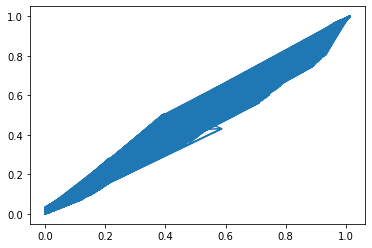

In [ ]:
#plot of S_pred1 vs s_actual1                
#pred1 corresponds to prediction on training sets , where as actual1 corresponds actual value(y_train)
plt.figure(figsize=(6,4))
plt.plot(df_7[0],y_train[3])                                   

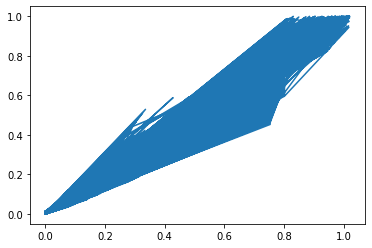

In [139]:
#plot of I_pred1 vs I_actual1
plt.figure(figsize=(6,4))
plt.plot(df_7[1],y_train[4])    

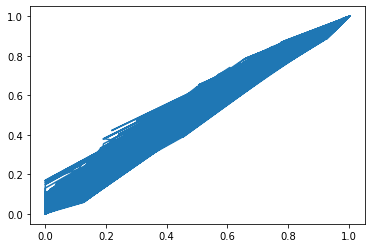

In [140]:
plt.figure(figsize=(6,4))
plt.plot(df_7[2],y_train[5])    #plot of R_pred1 vs R_actual1

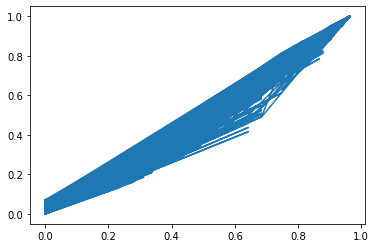

In [141]:
#plot of S_pred2 vs S_actual2
#pred2 corresponds to prediction on test sets , where as actual2 corresponds actual value(y_test)
plt.figure(figsize=(6,4))
plt.plot(df_8[0],y_test[3])    

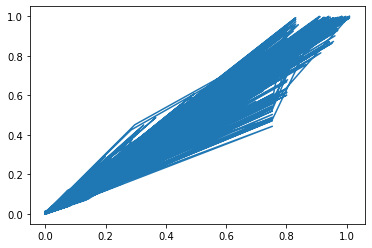

In [142]:
plt.figure(figsize=(6,4))
plt.plot(df_8[1],y_test[4])    #plot of I_pred2 vs I_actual2

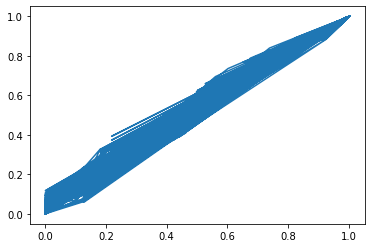

In [143]:
plt.figure(figsize=(6,4))
plt.plot(df_8[2],y_test[5])    #plot of R_pred2 vs R_actual2

In [164]:
Trial[0] = S_value[1]
Trial[1] = I_value[1]
Trial[2] = R_value[1]
Trial[3] = S_value[2]
Trial[4] = I_value[2]
Trial[5] = R_value[2]
Trial[6] = S_value[3]
Trial[7] = I_value[3]
Trial[8] = R_value[3]

In [165]:
from sklearn import preprocessing
float_array = Trial[[0,1,2,3,4,5,6,7,8]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [159]:
P = pd.DataFrame(model.predict(data_scaled[[0,1,2]]))
P

,0,1,2
0,0.289382,0.882377,0.548820
1,0.683694,0.801158,0.181360
2,0.960356,0.017865,0.000000
3,0.225715,0.789127,0.612641
4,0.748966,0.753567,0.121975
...,...,...,...
995,0.880382,0.282174,0.000000
996,0.908496,0.189260,0.000000
997,0.534629,0.909844,0.316983
998,0.353574,0.976397,0.484473


In [166]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7,8
0,0.476959,0.523470,0.522614,0.588982,0.412565,0.409493,0.683104,0.321015,0.312934
1,0.672483,0.327895,0.327140,0.771904,0.229220,0.226989,0.846085,0.156383,0.151541
2,0.987080,0.012942,0.012898,0.992877,0.007168,0.007079,0.996250,0.003821,0.003683
3,0.380282,0.620123,0.619315,0.485808,0.515790,0.512617,0.579065,0.425585,0.416463
4,0.709991,0.290363,0.289657,0.803022,0.197987,0.195983,0.870682,0.131451,0.127266
...,...,...,...,...,...,...,...,...,...
995,0.816236,0.184022,0.183508,0.884175,0.116478,0.115182,0.929877,0.071357,0.068937
996,0.878968,0.121215,0.120850,0.927220,0.073210,0.072356,0.958087,0.042672,0.041183
997,0.617473,0.382933,0.382123,0.723945,0.277331,0.274798,0.806283,0.196680,0.190867
998,0.541221,0.459205,0.458354,0.652920,0.348528,0.345653,0.743409,0.260215,0.253105


In [163]:
q = pd.DataFrame(model.predict(P))
q

,0,1,2
0,0.268889,0.852361,0.569363
1,0.683694,0.801158,0.181360
2,0.954922,0.035822,0.000000
3,0.205053,0.758864,0.633353
4,0.683694,0.801158,0.181360
...,...,...,...
995,0.837593,0.396277,0.127201
996,0.883362,0.272327,0.000000
997,0.522422,0.918745,0.328089
998,0.332066,0.944894,0.506034
